#[1주차] 기본과제 ( MNIST 분류(classification) 모델 구현 )

# MNIST 실습

제일 먼저 사용할 library들을 import합니다.

In [ ]:
import torch
import torchvision
import torchvision.transforms as transforms

다음은 dataset을 준비합니다. 손글씨 dataset은 MNIST라는 유명한 dataset이 있습니다. 이 dataset은 `torchvision`에서 제공하고 있으며, 다음과 같이 다운로드 받을 수 있습니다.

In [ ]:
transform = transforms.ToTensor()

trainset = torchvision.datasets.MNIST(
    root='./data',
    train=True,
    download=True,
    transform=transform
)

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 9912422/9912422 [00:10<00:00, 905196.87it/s] 


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 28881/28881 [00:00<00:00, 65142.83it/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 1648877/1648877 [00:06<00:00, 240664.30it/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 4542/4542 [00:00<00:00, 2954028.34it/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



trainset 데이터가 잘 다운 됬는지 확인 하기 위해서 한개 표시

60000
torch.Size([1, 28, 28]) 5


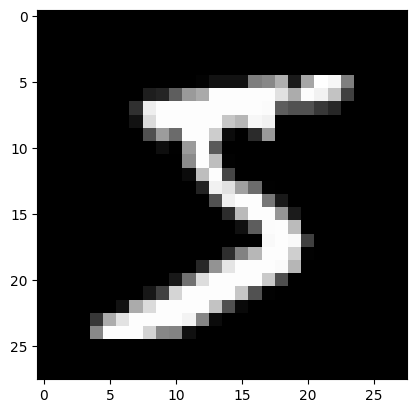

In [ ]:
from matplotlib import pyplot as plt


print(len(trainset))
print(trainset[0][0].shape, trainset[0][1])
plt.imshow(trainset[0][0][0], cmap='gray')

DataLoader가 dataset을 인자로 받아 batch_size 는 아래와 같이(64) 나눠주고,  완전 랜덤으로 batch를 구성해야 잘 동작하는 것을 알고 있기 때문에 shuffle에 True를 넘겨줍니다.

In [ ]:
batch_size = 64

trainloader = torch.utils.data.DataLoader(
    trainset,
    batch_size=batch_size,
    shuffle=True
)

DataLoader로 batch가 잘 나누어 졌는지 확인을 위해서 첫 번째 batch를 출력한 모습입니다.

In [ ]:
dataiter = iter(trainloader)
images, labels = next(dataiter)
print(images.shape, labels.shape)

torch.Size([64, 1, 28, 28]) torch.Size([64])


##Test data 준비하기

test를 위한 데이터 이기에 train 데이터는 다운 하지 않고 다운하는 코드입니다.

In [ ]:
transform = transforms.ToTensor()
testset = torchvision.datasets.MNIST(
    root='./Testdata',
    train=False,
    download=True,
    transform=transform
)

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 9912422/9912422 [00:11<00:00, 899062.42it/s] 


Extracting ./Testdata/MNIST/raw/train-images-idx3-ubyte.gz to ./Testdata/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 28881/28881 [00:00<00:00, 57543.18it/s]


Extracting ./Testdata/MNIST/raw/train-labels-idx1-ubyte.gz to ./Testdata/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 1648877/1648877 [00:01<00:00, 1211899.55it/s]


Extracting ./Testdata/MNIST/raw/t10k-images-idx3-ubyte.gz to ./Testdata/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 4542/4542 [00:00<00:00, 4373399.63it/s]

Extracting ./Testdata/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./Testdata/MNIST/raw



trainset 데이터가 잘 다운 됬는지 확인 하기 위해서 한개 표시

10000
torch.Size([1, 28, 28]) 7


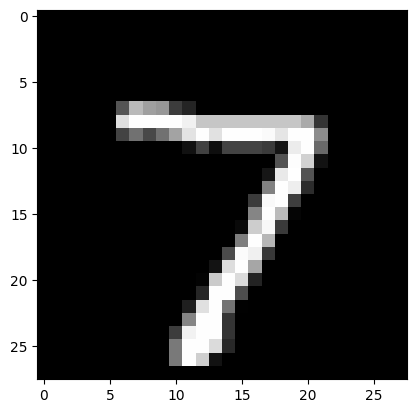

In [ ]:
#TestData 잘 가져왔는지 확인
from matplotlib import pyplot as plt


print(len(testset))
print(testset[0][0].shape, testset[0][1])
plt.imshow(testset[0][0][0], cmap='gray')

DataLoader가 dataset을 인자로 받아 batch_size 는 아래와 같이(64) 나눠주고,  완전 랜덤으로 batch를 구성해야 잘 동작하는 것을 알고 있기 때문에 shuffle에 True를 넘겨줍니다.

In [ ]:
batch_size = 64

testloader = torch.utils.data.DataLoader(
    testset,
    batch_size=batch_size,
    shuffle=False
)

DataLoader로 batch가 잘 나누어 졌는지 확인을 위해서 첫 번째 batch를 출력한 모습입니다.

In [ ]:
dataiter = iter(testloader)
images, labels = next(dataiter)
print(images.shape, labels.shape)

torch.Size([64, 1, 28, 28]) torch.Size([64])


## nn.CrossEntropyLoss 적용하기

첫 번쨰 batch의 크기인 (64, 1, 28, 28) shape의 image를 입력받아 nn.CrossEntropyLoss 사용을 위해서 출력에 class 개수 만큼 나오도록 해서 3-layer MLP를 구현합니다.

In [ ]:
from torch import nn


class Model(nn.Module):
  def __init__(self, input_dim, n_dim):
    super().__init__()

    self.layer1 = nn.Linear(input_dim, n_dim)
    self.layer2 = nn.Linear(n_dim, n_dim)
    self.layer3 = nn.Linear(n_dim, 10) #model output 변경

    self.act = nn.ReLU()

  def forward(self, x):
    x = torch.flatten(x, start_dim=1)
    x = self.act(self.layer1(x))
    x = self.act(self.layer2(x))
    x = self.act(self.layer3(x))

    return x


model = Model(28 * 28 * 1, 1024)

gradient descent를 수행해줄 optimizer를 구현하는 모습입니다.

In [ ]:
from torch.optim import SGD

lr = 0.001
model = model.to('cuda')

optimizer = SGD(model.parameters(), lr=lr)

nn.CrossEntropyLoss()를 사용하여 학습하는 코드입니다.

In [ ]:
# 기존에 사용중이던  MSE -> nn.CrossEntropyLoss 변경
criterion = nn.CrossEntropyLoss()
n_epochs = 100

for epoch in range(n_epochs):
  total_loss = 0.
  for data in trainloader:
    model.zero_grad()
    inputs, labels = data
    inputs, labels = inputs.to('cuda'), labels.to('cuda')

    preds = model(inputs)

    loss = criterion(preds, labels) #nn.CrossEntropyLoss()로 변경하는 코드
    loss.backward()
    optimizer.step()

    total_loss += loss.item()

  print(f"Epoch {epoch:3d} | Loss: {total_loss}")

Epoch   0 | Loss: 2134.834127187729
Epoch   1 | Loss: 2069.3270633220673
Epoch   2 | Loss: 1970.3467450141907
Epoch   3 | Loss: 1812.2106375694275
Epoch   4 | Loss: 1588.3581848144531
Epoch   5 | Loss: 1343.8690435886383
Epoch   6 | Loss: 1146.277964234352
Epoch   7 | Loss: 1010.8898263573647
Epoch   8 | Loss: 917.3431395888329
Epoch   9 | Loss: 849.5027159452438
Epoch  10 | Loss: 797.550395399332
Epoch  11 | Loss: 756.337849855423
Epoch  12 | Loss: 722.9831141531467
Epoch  13 | Loss: 695.640683054924
Epoch  14 | Loss: 672.4228757917881
Epoch  15 | Loss: 652.2612806558609
Epoch  16 | Loss: 635.1300869584084
Epoch  17 | Loss: 619.9188987314701
Epoch  18 | Loss: 606.7017395496368
Epoch  19 | Loss: 594.8932372927666
Epoch  20 | Loss: 584.6068924963474
Epoch  21 | Loss: 574.999523639679
Epoch  22 | Loss: 566.4831894040108
Epoch  23 | Loss: 558.7082955390215
Epoch  24 | Loss: 551.7300793528557
Epoch  25 | Loss: 545.2155901789665
Epoch  26 | Loss: 539.0798158347607
Epoch  27 | Loss: 533.8915

## 학습을 진행한 후, epoch에 따른 model의 train과 test data에 대한 정확도 plot하기
( 학습 조건 n_epochs=100, batch_size=256, lr=0.001 )

dataloader에 대한 model의 정확도를 측정하는 함수입니다.

In [ ]:
#dataloader에 대한 model의 정확도를 측정하는 코드
def accuracy(model, dataloader):
  cnt = 0
  acc = 0

  for data in dataloader:
    inputs, labels = data
    inputs, labels = inputs.to('cuda'), labels.to('cuda')

    preds = model(inputs)
    preds = torch.argmax(preds, dim=-1)

    cnt += labels.shape[0]
    acc += (labels == preds).sum().item()

  return acc / cnt

학습 조건인 batch_size를 변경해서 학습을 위해서 batch_size 변경 후 DataLoader를 이용해서 trainset과 testSet에 적용하는 코드 입니다.

In [ ]:
batch_size = 256 #학습 조건 적용

#train데이터 loader
trainloader = torch.utils.data.DataLoader(
    trainset,
    batch_size=batch_size,
    shuffle=True
)

#test데이터 loader
testloader = torch.utils.data.DataLoader(
    testset,
    batch_size=batch_size,
    shuffle=False
)

trainset과 testset데이터가 DataLoader로 batch가 잘 나누어 졌는지 확인을 위해서 첫 번째 batch를 출력한 코드입니다.

In [ ]:
print("trainloader")
dataiter = iter(trainloader)
images, labels = next(dataiter)
print(images.shape, labels.shape)

print("testloader")
dataiter = iter(testloader)
images, labels = next(dataiter)
print(images.shape, labels.shape)

trainloader
torch.Size([256, 1, 28, 28]) torch.Size([256])
testloader
torch.Size([256, 1, 28, 28]) torch.Size([256])


첫 번쨰 batch의 크기인 (256, 1, 28, 28) shape의 image를 입력받아 nn.CrossEntropyLoss 사용을 위해서 출력에 class 개수 만큼 나오도록 해서 3-layer MLP를 구현합니다.

In [ ]:
from torch import nn


class Model(nn.Module):
  def __init__(self, input_dim, n_dim):
    super().__init__()

    self.layer1 = nn.Linear(input_dim, n_dim)
    self.layer2 = nn.Linear(n_dim, n_dim)
    self.layer3 = nn.Linear(n_dim, 10)

    self.act = nn.ReLU()

  def forward(self, x):
    x = torch.flatten(x, start_dim=1)
    x = self.act(self.layer1(x))
    x = self.act(self.layer2(x))
    x = self.act(self.layer3(x))

    return x


model = Model(28 * 28 * 1, 1024)

gradient descent를 수행해줄 optimizer를 구현하면서, 학습 조건인 lr=0.001을 적용한 코드입니다.

In [ ]:
from torch.optim import SGD

lr = 0.001
model = model.to('cuda')

optimizer = SGD(model.parameters(), lr=lr)

nn.CrossEntropyLoss()를 사용하여 학습하면서, 매 epoch가 끝난 뒤에 model의 trainloader(trainloader_acc)와 testloader(testloader_acc)에 대한 정확도를 각각 list로 저장하는 코드입니다.

In [ ]:
#기존에 학습 코드를 응용해서 model의 trainloader와 testloader의 정확도를 저장하는 코드 추가
criterion = nn.CrossEntropyLoss()
trainloader_acc = []
testloader_acc = []
n_epochs = 100

for epoch in range(n_epochs):
  total_loss = 0.
  for data in trainloader:
    model.zero_grad()
    inputs, labels = data

    inputs, labels = inputs.to('cuda'), labels.to('cuda')

    preds = model(inputs)

    loss = criterion(preds, labels)
    loss.backward()
    optimizer.step()

    total_loss += loss.item()

  trainloader_acc.append(accuracy(model, trainloader))
  testloader_acc.append(accuracy(model, testloader))

  print(f"Epoch {epoch:3d} | Loss: {total_loss}")

Epoch   0 | Loss: 540.1705708503723
Epoch   1 | Loss: 538.5062685012817
Epoch   2 | Loss: 536.5106287002563
Epoch   3 | Loss: 534.383448600769
Epoch   4 | Loss: 532.1772961616516
Epoch   5 | Loss: 529.8208260536194
Epoch   6 | Loss: 527.2433853149414
Epoch   7 | Loss: 524.4393880367279
Epoch   8 | Loss: 521.3127160072327
Epoch   9 | Loss: 517.8403549194336
Epoch  10 | Loss: 514.0283579826355
Epoch  11 | Loss: 509.7522222995758
Epoch  12 | Loss: 505.11400604248047
Epoch  13 | Loss: 500.00382375717163
Epoch  14 | Loss: 494.5041241645813
Epoch  15 | Loss: 488.71496653556824
Epoch  16 | Loss: 482.58010149002075
Epoch  17 | Loss: 476.2630207538605
Epoch  18 | Loss: 469.82070457935333
Epoch  19 | Loss: 463.3101798295975
Epoch  20 | Loss: 456.857675075531
Epoch  21 | Loss: 450.3351732492447
Epoch  22 | Loss: 443.23562133312225
Epoch  23 | Loss: 435.9125372171402
Epoch  24 | Loss: 428.8540692329407
Epoch  25 | Loss: 421.8015172481537
Epoch  26 | Loss: 415.13705909252167
Epoch  27 | Loss: 408.4

Epoch에 따른 train과 test data에 대한 model의 정확도를 시각화 하는 코드입니다.

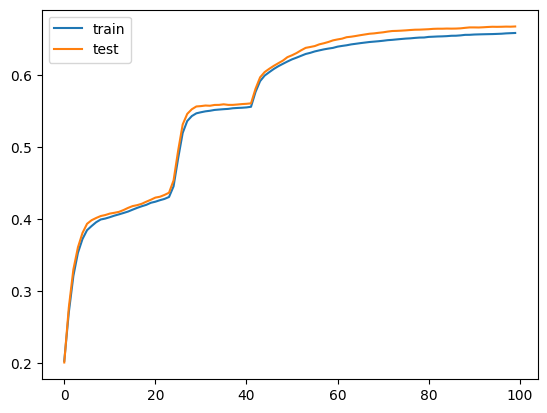

In [ ]:
import numpy as np
#Epoch에 따른 train과 test data에 대한 model의 정확도를 다음 코드를 사용하여 plot하는 함수
def plot_acc(train_accs, test_accs, label1='train', label2='test'):
  x = np.arange(len(train_accs))

  plt.plot(x, train_accs, label=label1)
  plt.plot(x, test_accs, label=label2)
  plt.legend()
  plt.show()

# plot하는 함수 사용
plot_acc(trainloader_acc, testloader_acc)

추가로 실제로 학습한 모델이 잘 예측하는지 확인하기 위해서 그림으로 그려주고 예측한 값을 보여주는 코드입니다.

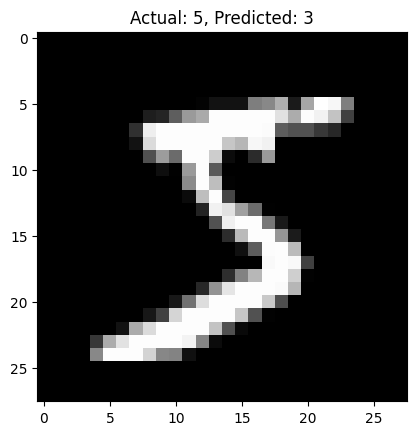

모델 출력: tensor([[0.0000, 0.0000, 0.3509, 2.2698, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000]], device='cuda:0')
예측한 숫자: 3
실제 숫자: 5


In [ ]:
idx = 0

x = trainset[idx][0][None]  # (1, 1, 28, 28)
x = x.to('cuda')

# 예측 결과 얻기
with torch.no_grad():
    output = model(x)

# 예측 결과 해석
predicted_class = torch.argmax(output).item()

plt.imshow(trainset[idx][0][0], cmap='gray')
plt.title(f"Actual: {trainset[idx][1]}, Predicted: {predicted_class}")
plt.show()

print("모델 출력:", output)
print(f"예측한 숫자: {predicted_class}")
print(f"실제 숫자: {trainset[idx][1]}")

위의 출력을 보아 예측에 실패한 것을 알 수 있다.